In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
df = sns.load_dataset("planets")

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1035, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.

In [5]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing numerical columns with median (less affected by outliers)
df['mass'].fillna(df['mass'].median(), inplace=True)
df['orbital_period'].fillna(df['orbital_period'].median(), inplace=True)
df['distance'].fillna(df['distance'].median(), inplace=True)

# Drop rows with missing categorical values (if any)
df.dropna(subset=['method'], inplace=True)

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

print("\nAfter Cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

After Cleaning:
 method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64


C:\Users\SANJANA\AppData\Local\Temp\ipykernel_24592\902019849.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mass'].fillna(df['mass'].median(), inplace=True)
C:\Users\SANJANA\AppData\Local\Temp\ipykernel_24592\902019849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Pandas & NumPy Operations

In [6]:
# Count how many unique discovery methods are used
print("Unique Discovery Methods:", df['method'].nunique())
print("\nMethods:\n", df['method'].value_counts())

# Mean mass and distance
print("\nMean planet mass:", df['mass'].mean())
print("Median planet distance:", df['distance'].median())


Unique Discovery Methods: 10

Methods:
 method
Radial Velocity                  553
Transit                          397
Imaging                           37
Microlensing                      20
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

Mean planet mass: 1.9457384869059169
Median planet distance: 55.25


Data Visualization

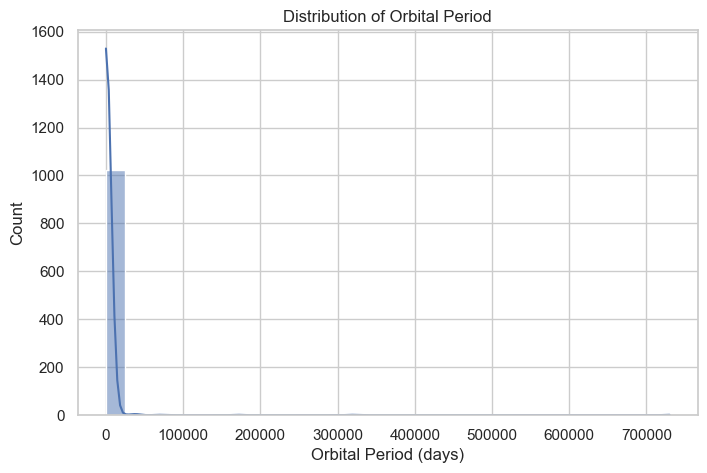

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['orbital_period'], bins=30, kde=True)
plt.title("Distribution of Orbital Period")
plt.xlabel("Orbital Period (days)")
plt.show()


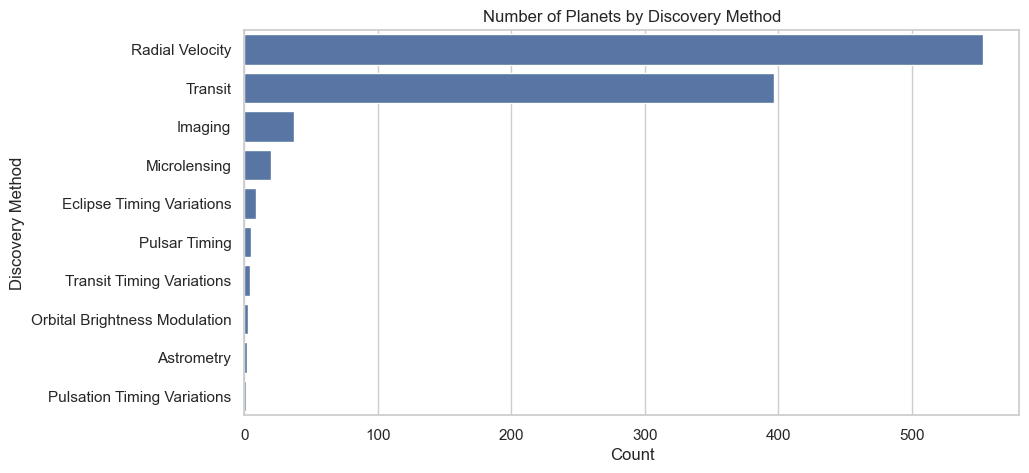

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y='method', data=df, order=df['method'].value_counts().index)
plt.title("Number of Planets by Discovery Method")
plt.xlabel("Count")
plt.ylabel("Discovery Method")
plt.show()


### Insights
Radial Velocity is the most common planet discovery method.

Transit method ranks second, reflecting modern telescope usage.

Other methods like Microlensing and Imaging are used rarely.

The plot shows a strong bias toward the top two detection techniques.

This indicates technological preference and efficiency in planet discovery methods.